Binary classification --> 1 or 2

Multiclass classification --> more one things than the other

Multilabel classification --> multiple label options per sample

# 02. NN classifcation with PyTorch

Classification is a problem of predicting wheter something is one thing or another

## 1. Make classification data and get it ready


In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# Make 1000 sample
n_sample = 1000

# Create circles
X, y = make_circles(n_sample,
                    noise =0.03,
                    random_state =42) # random seed

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
# Make DataFromae of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], # get all values from column 0
                        "X2": X[:, 1], # get all vales from column 1
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


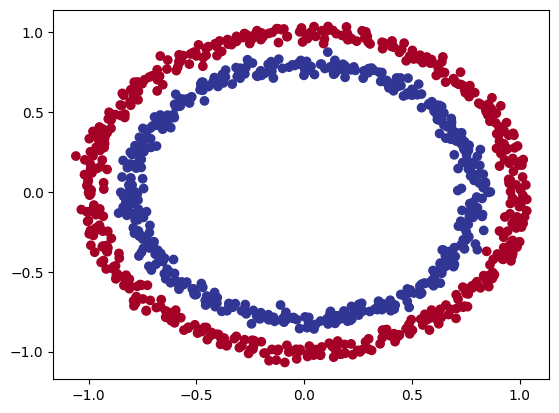

In [6]:
# Graphic
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)


### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# view the first exampel of features and labesl
X_sample = X[0]
y_sample = y[0]

print(f"Values for one samle of X: {X_sample} and the same for y: {y_sample}" )
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one samle of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    train_size = 0.8,
                                                    random_state=42 # similar to maula_seed but manual_seed only works with PyTorch and not with sklearn
                                                  )

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

model to classify blue and red dots

To do so we want to:
1. Setup device agonistic code so our code will run on a GPU
2. Construct a model(by syblcassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [14]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnostic code, let's creata a model that:

1. Subclasses nn.Module
2. Create 2 nn.Linear() layers that are capable of handling tha shapes of our data
3. Defines a forward() method that outlies the forwar pass of the model --> have to do since in nn.Module
4. Instatiate an instance of our model class and send it to the target device

In [15]:
X_train.shape

torch.Size([800, 2])

In [16]:
(y_train).shape

torch.Size([800])

In [17]:
# 1. Construct a model that sublvasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handing the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features= 5) # takes in 2 feauters cuz (800, "2") and upscales to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features= 1) # takes in 5 features(from previous layer) and output a single feature(same size as y)

    # Another way of doing it nn.Sequentiaol() basically makes it so the nn goes sequentialy from 1 to n
    # self.two_linear_layers = nn.Sequential(
    # nn.Linear(in_features=2, out_features=5),
    # nn.Linear(in_features=5, out_features =1))

    # 3. define a forward() method that outlines the forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1) # x -> layer_1 -> layer_2 -> output
      # return two_linear_layers

# 4. Instantiate and instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next(model_0.parameters()).device

device(type='cpu')

In [19]:
# Lets replicate the model above using nn.Sequential()
model_0 =nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features =1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()
# 0.weight --> 10 since 5*2
# 0.bias --> 5 since 5 out_features
# 1.weight --> 5 sice 5*1
# 1.bias --> 1 since 1 out_feature

OrderedDict([('0.weight',
              tensor([[-0.4915, -0.4250],
                      [-0.1512, -0.5599],
                      [ 0.5228, -0.0227],
                      [ 0.1466, -0.3109],
                      [-0.1292, -0.0179]])),
             ('0.bias', tensor([-0.5622,  0.2109, -0.6228, -0.4353,  0.0774])),
             ('1.weight',
              tensor([[-0.2152,  0.3252,  0.0473, -0.2854, -0.0623]])),
             ('1.bias', tensor([-0.3608]))])

In [21]:
# Make preidctions
# Random predictions before the training loop
# PyTorch first gives random numbers and then fits them thats why the preds are so bad
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Len of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Len of test sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirs 10 preditions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Len of predictions: 200, Shape: torch.Size([200, 1])
Len of test sample: 200, Shape: torch.Size([200, 2])

Firs 10 preditions: 
tensor([[-0.1004],
        [-0.0824],
        [-0.1141],
        [-0.0967],
        [-0.0608],
        [-0.0502],
        [-0.0416],
        [-0.0340],
        [-0.1164],
        [-0.0806]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss fn and optimizer

Which loss fn or optimizer should you use?

This is problem specific.

For example for regraeesion you might want MAR or MSE

For classification you might want binary cross entropy(BCE) or categorical cross entropy

And for optimizers, two of the most common are SGD and ADAM

In [23]:
# Steup the loss function
# loss_fn = nn.BCELOSS() # requires inputs to have go through the Sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # this has the Sigmoid activation function build in, more numerical stable

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.1)


In [24]:
# Calcualte accuracy - out of 100 example, what % does our model get right
def accuracy_fn(y_true, y_pred):
  # The torch.eq() function in PyTorch is used for element-wise comparison of two tensors.
  correct = torch.eq(y_true, y_pred).sum().item() # .item() used with PyTorch tensors to obtain the scalar value from a tensor that contains only one element
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

### 3.1 Going from row logits -> prediciont probabilities -> predcition labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediciton probabilites** by passing them to some kind of activation fucntion (e.g. sigmoid or softmax)

Then we can convert our model's **prediction probabilites** to **predciton labesl** by either rounding or taking the `argmax()`

In [25]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1004],
        [-0.0824],
        [-0.1141],
        [-0.0967],
        [-0.0608]])

In [26]:
# the in features are not close to our our feateres
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# Use the sigmoid activation function on our model logits to turn them into proedction probabilitiles
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4749],
        [0.4794],
        [0.4715],
        [0.4759],
        [0.4848]])

For out prediction probability values, we need to perform a range-style rounding on them:


*   y_pred_probs >= 0.5, y=1 (class1)
*   y_pred_probs < 0.5, y=0 (class0)



In [28]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs) # y_red_probs --> y_preds
print(y_preds)

# In full(in one line)(logits -> pred probs -> pred labels)
y_pred_lables = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Chek for equality
print(torch.eq(y_preds.squeeze(), y_pred_lables.squeeze()))

# Get rid of extra dim
y_preds.squeeze()

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a traing loop

In [29]:
torch.cuda.manual_seed(42) # cuda since we are working on cuda

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and eval loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calc loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELOSS expects pred probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # because we use nn.BCEWithLogitsLoss() the loss fn expects raw logits as input if we were using normal BCE we would pass preds
                 y_train)

  acc = accuracy_fn(y_true=y_train, # labels to labels
                    y_pred=y_pred)

  #3. Optimizer zer grad
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. Optimizer step(GD)
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test, # backward cuz sklrean metric work that way that u put true and then pred, PyTorch works in the opposite
                           y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:}, Acc: {acc}% | Test loss: {test_loss}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.6939912438392639, Acc: 50.0% | Test loss: 0.6944616436958313, Test acc: 50.0%
Epoch: 10 | Loss: 0.6933691501617432, Acc: 48.625% | Test loss: 0.6940637230873108, Test acc: 45.5%
Epoch: 20 | Loss: 0.6931602954864502, Acc: 47.5% | Test loss: 0.6939969062805176, Test acc: 47.0%
Epoch: 30 | Loss: 0.6930868029594421, Acc: 48.75% | Test loss: 0.6940242648124695, Test acc: 49.5%
Epoch: 40 | Loss: 0.6930574178695679, Acc: 49.625% | Test loss: 0.694072961807251, Test acc: 48.5%
Epoch: 50 | Loss: 0.6930429339408875, Acc: 50.24999999999999% | Test loss: 0.6941223740577698, Test acc: 47.5%
Epoch: 60 | Loss: 0.693033754825592, Acc: 50.375% | Test loss: 0.6941677927970886, Test acc: 47.5%
Epoch: 70 | Loss: 0.6930269002914429, Acc: 50.5% | Test loss: 0.6942083835601807, Test acc: 47.0%
Epoch: 80 | Loss: 0.6930211782455444, Acc: 50.625% | Test loss: 0.6942449808120728, Test acc: 47.5%
Epoch: 90 | Loss: 0.6930162906646729, Acc: 50.625% | Test loss: 0.6942781209945679, Test acc: 48.0%

## 4. Make predictions and evalaute the model

From the metrics it looks like our mode is not learning anything

So to ispect it let's mamke some predictions and make them visual

To do se we are going to import a fuction called "plot_decision_boundary"

In [30]:
import requests
from pathlib import Path

# Dowlandad helper functions fomr Leanr Pytorch repo
if Path("helper_functions.py").is_file():
  print("already exists")
else:
  print("downlad helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f: # wb --> write permition, f --> names its
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downlad helper_functions.py


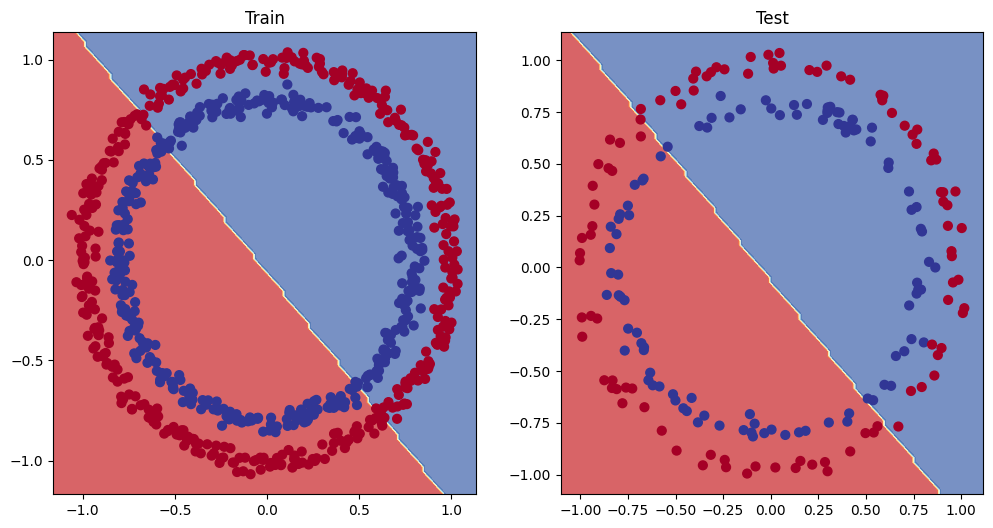

In [31]:
# Plot decsion boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model(from a model perspective)

* Add more layers - give the model more changes to learn about patters in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Chaning the activation function
* Change the learnign rate (the amount the optimizer will adjust)
* Change the loss function

These options are all from a model's perspective because they deal direclty with the model, rather than the data.

And because there options are all values we (as ML engineers and data scientsist) can change, they are referred as **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000


In [32]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writnig operation leverage sped ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# Create a loss fn
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [34]:
# Write a training and eval loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Traing for longer
epochs = 1000

#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Trainig
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabiliitles -> prediction labels

  # 2. Loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  # 3. Optimizer zer grad
  optimizer.zero_grad()

  # 4. Loss backwars
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calc loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69815, Acc: 50.00% | Test loss: 0.69744, Test acc: 50.00%
Epoch: 10 | Loss: 0.69489, Acc: 50.00% | Test loss: 0.69462, Test acc: 50.00%
Epoch: 20 | Loss: 0.69374, Acc: 50.00% | Test loss: 0.69369, Test acc: 50.00%
Epoch: 30 | Loss: 0.69333, Acc: 50.00% | Test loss: 0.69341, Test acc: 50.00%
Epoch: 40 | Loss: 0.69318, Acc: 50.00% | Test loss: 0.69335, Test acc: 50.00%
Epoch: 50 | Loss: 0.69313, Acc: 50.00% | Test loss: 0.69337, Test acc: 50.00%
Epoch: 60 | Loss: 0.69310, Acc: 44.62% | Test loss: 0.69340, Test acc: 46.00%
Epoch: 70 | Loss: 0.69309, Acc: 49.25% | Test loss: 0.69344, Test acc: 45.50%
Epoch: 80 | Loss: 0.69308, Acc: 50.88% | Test loss: 0.69349, Test acc: 46.00%
Epoch: 90 | Loss: 0.69307, Acc: 51.25% | Test loss: 0.69353, Test acc: 45.50%
Epoch: 100 | Loss: 0.69306, Acc: 50.88% | Test loss: 0.69357, Test acc: 46.50%
Epoch: 110 | Loss: 0.69306, Acc: 51.12% | Test loss: 0.69360, Test acc: 46.50%
Epoch: 120 | Loss: 0.69305, Acc: 50.88% | Test loss: 0.69364, T

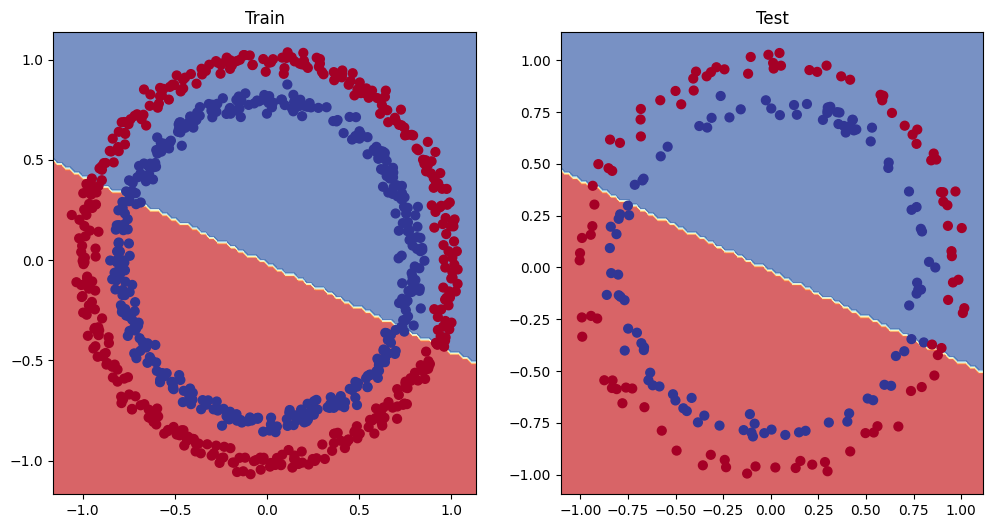

In [35]:
# Plot decsion boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fir a straing line

One way to troubleshoot to a larger problem is to test out a smaller problem,

In [36]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Createa data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight* X_regression + bias  # Lin Reg formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the len of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

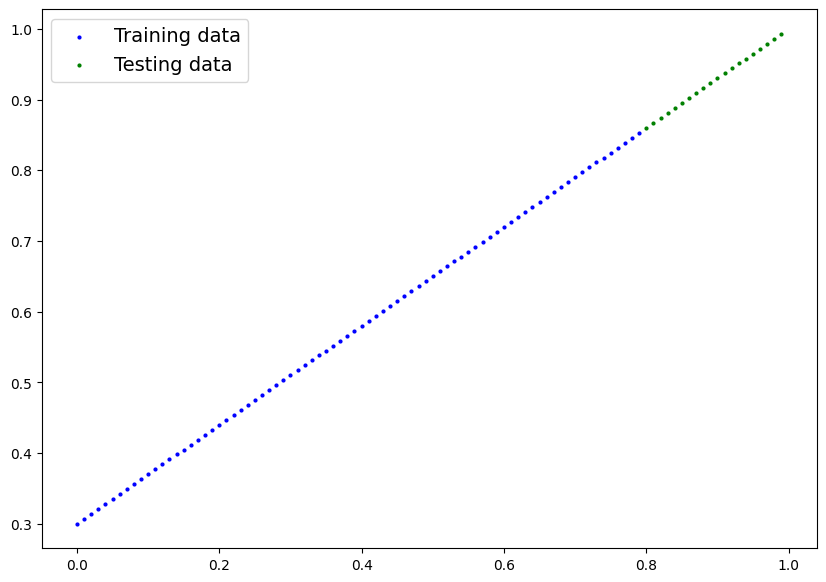

In [38]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels =y_test_regression)

In [39]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
### 5.3 Adjust model_1 to fit a straight line
# Same archtecture as model_ but using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features =10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# Loss and potim
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.01)

In [42]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}| Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986| Test loss: 0.91103
Epoch: 100 | Loss: 0.02858| Test loss: 0.00081
Epoch: 200 | Loss: 0.02533| Test loss: 0.00209
Epoch: 300 | Loss: 0.02137| Test loss: 0.00305
Epoch: 400 | Loss: 0.01964| Test loss: 0.00341
Epoch: 500 | Loss: 0.01940| Test loss: 0.00387
Epoch: 600 | Loss: 0.01903| Test loss: 0.00379
Epoch: 700 | Loss: 0.01878| Test loss: 0.00381
Epoch: 800 | Loss: 0.01840| Test loss: 0.00329
Epoch: 900 | Loss: 0.01798| Test loss: 0.00360


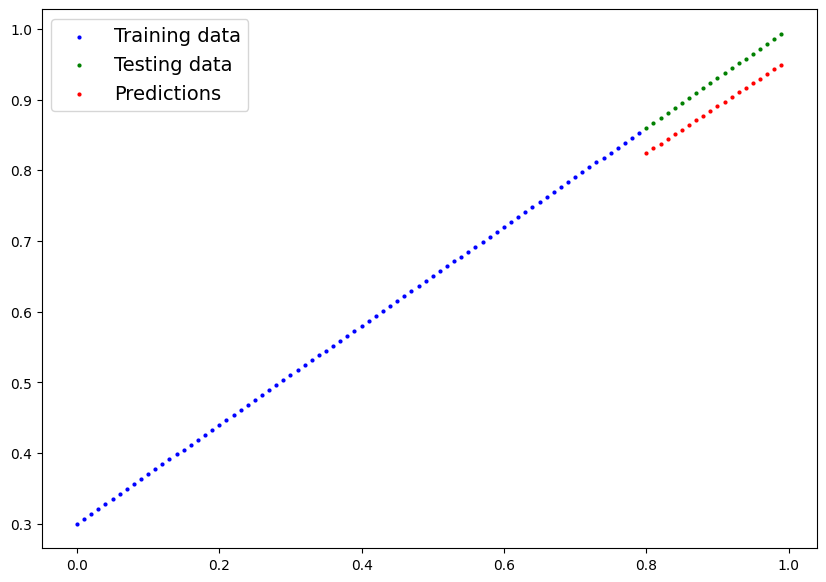

In [43]:
# Turn on eval mode
model_2.eval()

# Make prediction(inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and pred
plot_predictions(train_data = X_train_regression.cpu(), # .cpu() becasue matplotlib works with numpy which works with cpu
                 train_labels = y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linerity



### 6.1 Recreating non-linear data(red and blue ciricles)

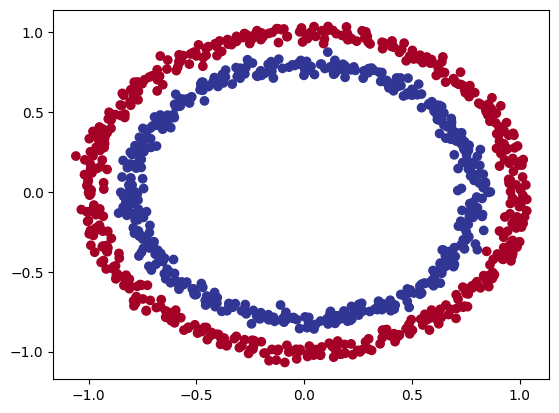

In [44]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


n_samples = 1000
X , y = make_circles(n_samples,
                   noise=0.03,
                   random_state =42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

In [45]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split
device = "cuda" if torch.cuda.is_available() else "cpu"


#Turn data into tesntos
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size =0.2,
                                                    train_size = 0.8,
                                                    random_state = 42
                                                  )

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Buidling a model with non-linearity

* Linear = straight line
* Non-linear = non-straight line

Logits --> raw output of out model

Artificial nn are a large conbination of linewar and non-linear function which are potetnially able to find patterns in data.

In [46]:
# Build a model wtih non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self,x):
    #where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
## Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr =0.1)

### 6.3 Train model with non-linearlity


In [48]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Epochs
epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss= loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  test_loss = loss_fn(test_logits, y_test)
  test_acc = accuracy_fn(y_true=y_test,
                         y_pred = test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%


### 6.4 Evaluating a model traind with non-linear activation fuctions

In [49]:
# make predciton
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

# WE ALWAYS WANT THE PREDCITON TO LOOK LIKE THE TARGET LABLES(APPLES TO APLLES)
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

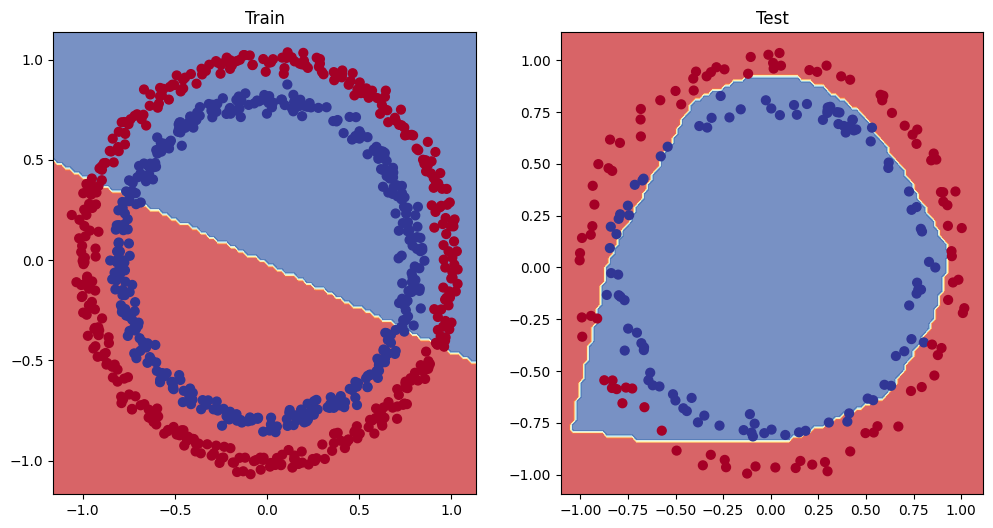

In [50]:
# Plot decision boundaires
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # linear
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # non-linear

## 7. Replicatin non-liear activation function

NN, rather than us telling the model what to learn, we give it tools to deicvoer patters in data nad it tries to figure out the patterns on its onw

The tools are linear and non-linear function

In [51]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32) # flaot32 tensor type
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

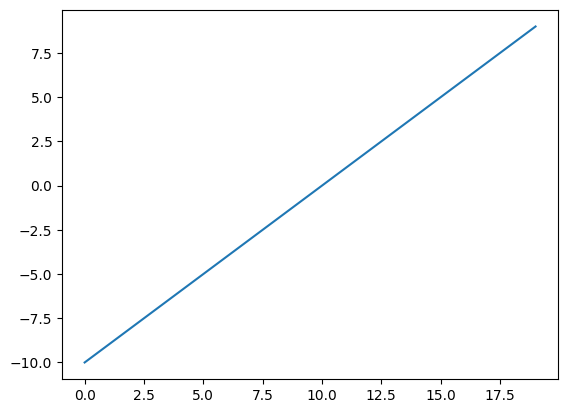

In [52]:
# Visualize the tesnot
plt.plot(A)

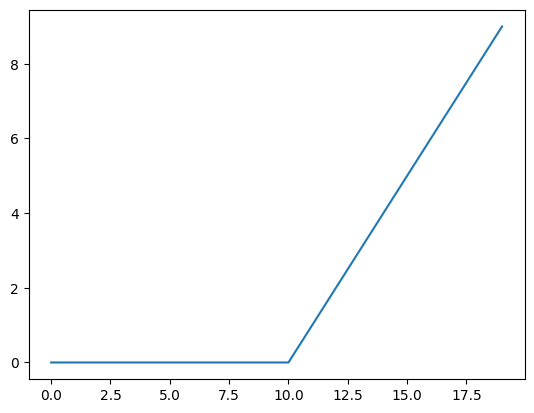

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)# inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

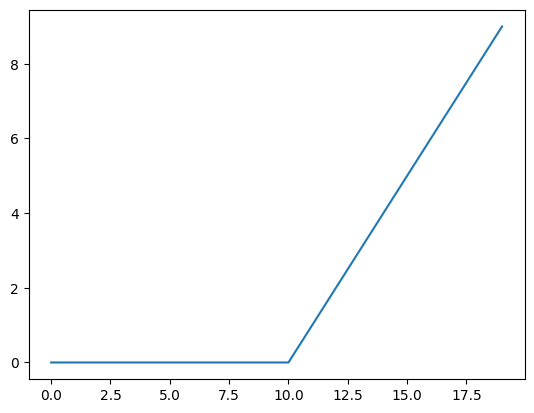

In [55]:
# Plot ReLU activation function
plt.plot(relu(A))

In [56]:
# Now lest do the same for sigmoid
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

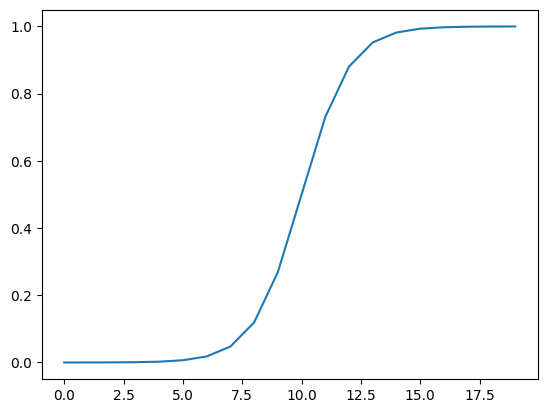

In [57]:
plt.plot(torch.sigmoid(A))

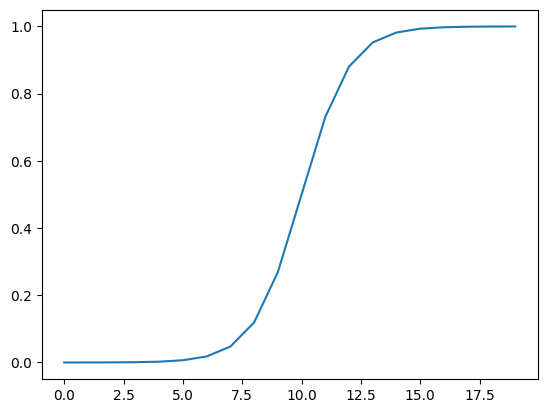

In [58]:
plt.plot(sigmoid(A))

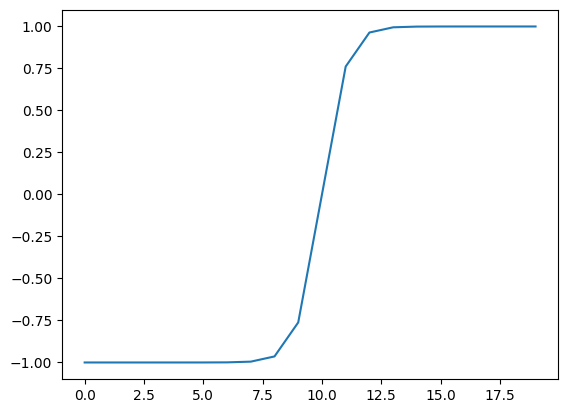

In [59]:
plt.plot(torch.tanh(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one things or another
* Multi-class classification = more than one thing or another

### 8.1 Creating a toy multi-class dataset

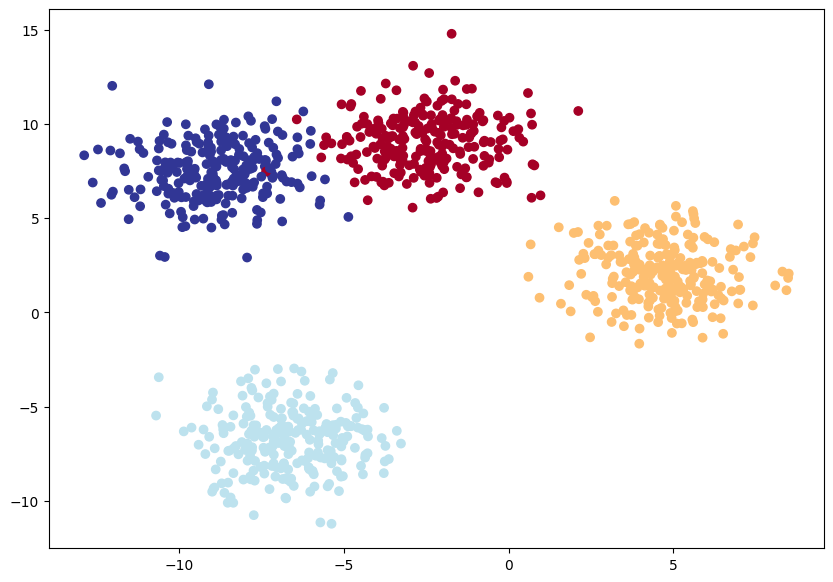

In [135]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples =1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a littlw size up
                            random_state=RANDOM_SEED)


# 2. turn data into tensors cuz sklearn uses numpy
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch


In [136]:
# Createa device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [137]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initizalies multi-class classification model:

    Args:
      input_feautres(int): NUmber of input features to the model
      output_features (int) : Number of outputs features(number of output classes)
      hidden_units (int): NUmber of hidden units between layers, defult 8

    Returns:

    Example:
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
      return self.linear_layer_stack(x)

# Create an instance of BlobModel and set it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creata a loss fucntion and an optimizer for a mult-class classification mode

In [138]:
# Loss
loss_fn = torch.nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                         lr = 0.1)



### 8.4 Getting predictoin prob for a mult-class PyTroch mode

In order to eval and train and test out model, we need to convert our model's output (logits) to pred prob and then to preidction labels.

Logits(raw output of the model) -> Pred probs(use torch.softmax) -> pred labels(take the argmax of pred probs)

In [139]:
# Lets get some raw outpus of our model(logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test).to(device)

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [140]:
# The y_preds need to be in the format as y_blob_test
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [141]:
# Convert our model's logit outputs to pred probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [142]:
torch.sum(y_pred_probs[0]) # softmax makes it so they all equal 1 since 1 = 100%

tensor(1.0000)

In [143]:
torch.max(y_pred_probs[0]) # class 2 is the most probably with 0.3244 or 32.44 %

tensor(0.3244)

In [144]:
torch.argmax(y_pred_probs[0]) # class 2 (position 1 of the list is the largest)

tensor(1)

In [145]:
# Convert our model's prediction probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds #random predictions cuz before training

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [146]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training loop and testing loop for multi-class PyTorch model

In [147]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put Data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test loss: 1.07554, Test acc: 48.00%
Epoch: 10 | Loss: 0.6448, Acc: 96.75% | Test loss: 0.66069, Test acc: 97.50%
Epoch: 20 | Loss: 0.4254, Acc: 98.50% | Test loss: 0.43074, Test acc: 100.00%
Epoch: 30 | Loss: 0.2529, Acc: 99.12% | Test loss: 0.24508, Test acc: 99.50%
Epoch: 40 | Loss: 0.1123, Acc: 99.25% | Test loss: 0.10229, Test acc: 99.50%
Epoch: 50 | Loss: 0.0663, Acc: 99.25% | Test loss: 0.05848, Test acc: 99.50%
Epoch: 60 | Loss: 0.0507, Acc: 99.25% | Test loss: 0.04293, Test acc: 99.50%
Epoch: 70 | Loss: 0.0430, Acc: 99.25% | Test loss: 0.03491, Test acc: 99.50%
Epoch: 80 | Loss: 0.0384, Acc: 99.25% | Test loss: 0.02988, Test acc: 99.50%
Epoch: 90 | Loss: 0.0352, Acc: 99.25% | Test loss: 0.02663, Test acc: 99.50%


### 8.6 Makeing and evaluating prediction with PyTorch mulit-class model

In [148]:
# Make prediction
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 preds
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [149]:
# Go from logits -> Prediction probs
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [150]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [151]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])

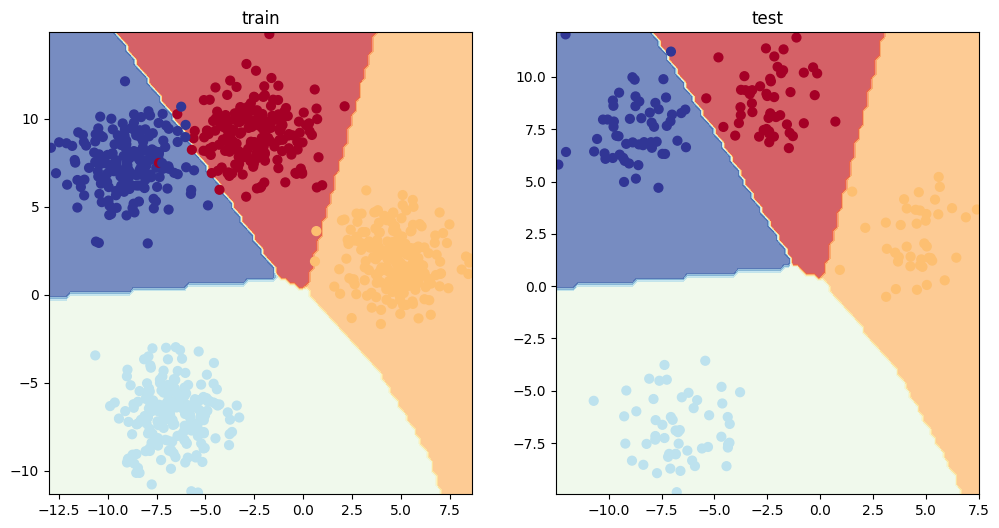

In [153]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics ... (to evalaute out classificatio model)

* Accuracy  - out 0f 100 samples, how many deos our model get right?
* Precision  
* Recall  
* F1-score
* Confusion matrix
* Classification report

`torchmetrics` or `sklearn.metrics`

https://builtin.com/data-science/precision-and-recall

https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134

In [154]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 10.9 MB/s eta 0:00:00


In [157]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass',
                                     num_classes=4).to(device)

#Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)